In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import os

In [2]:
df = pd.read_csv("mushrooms.csv")
pd.set_option('display.max_columns', None)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


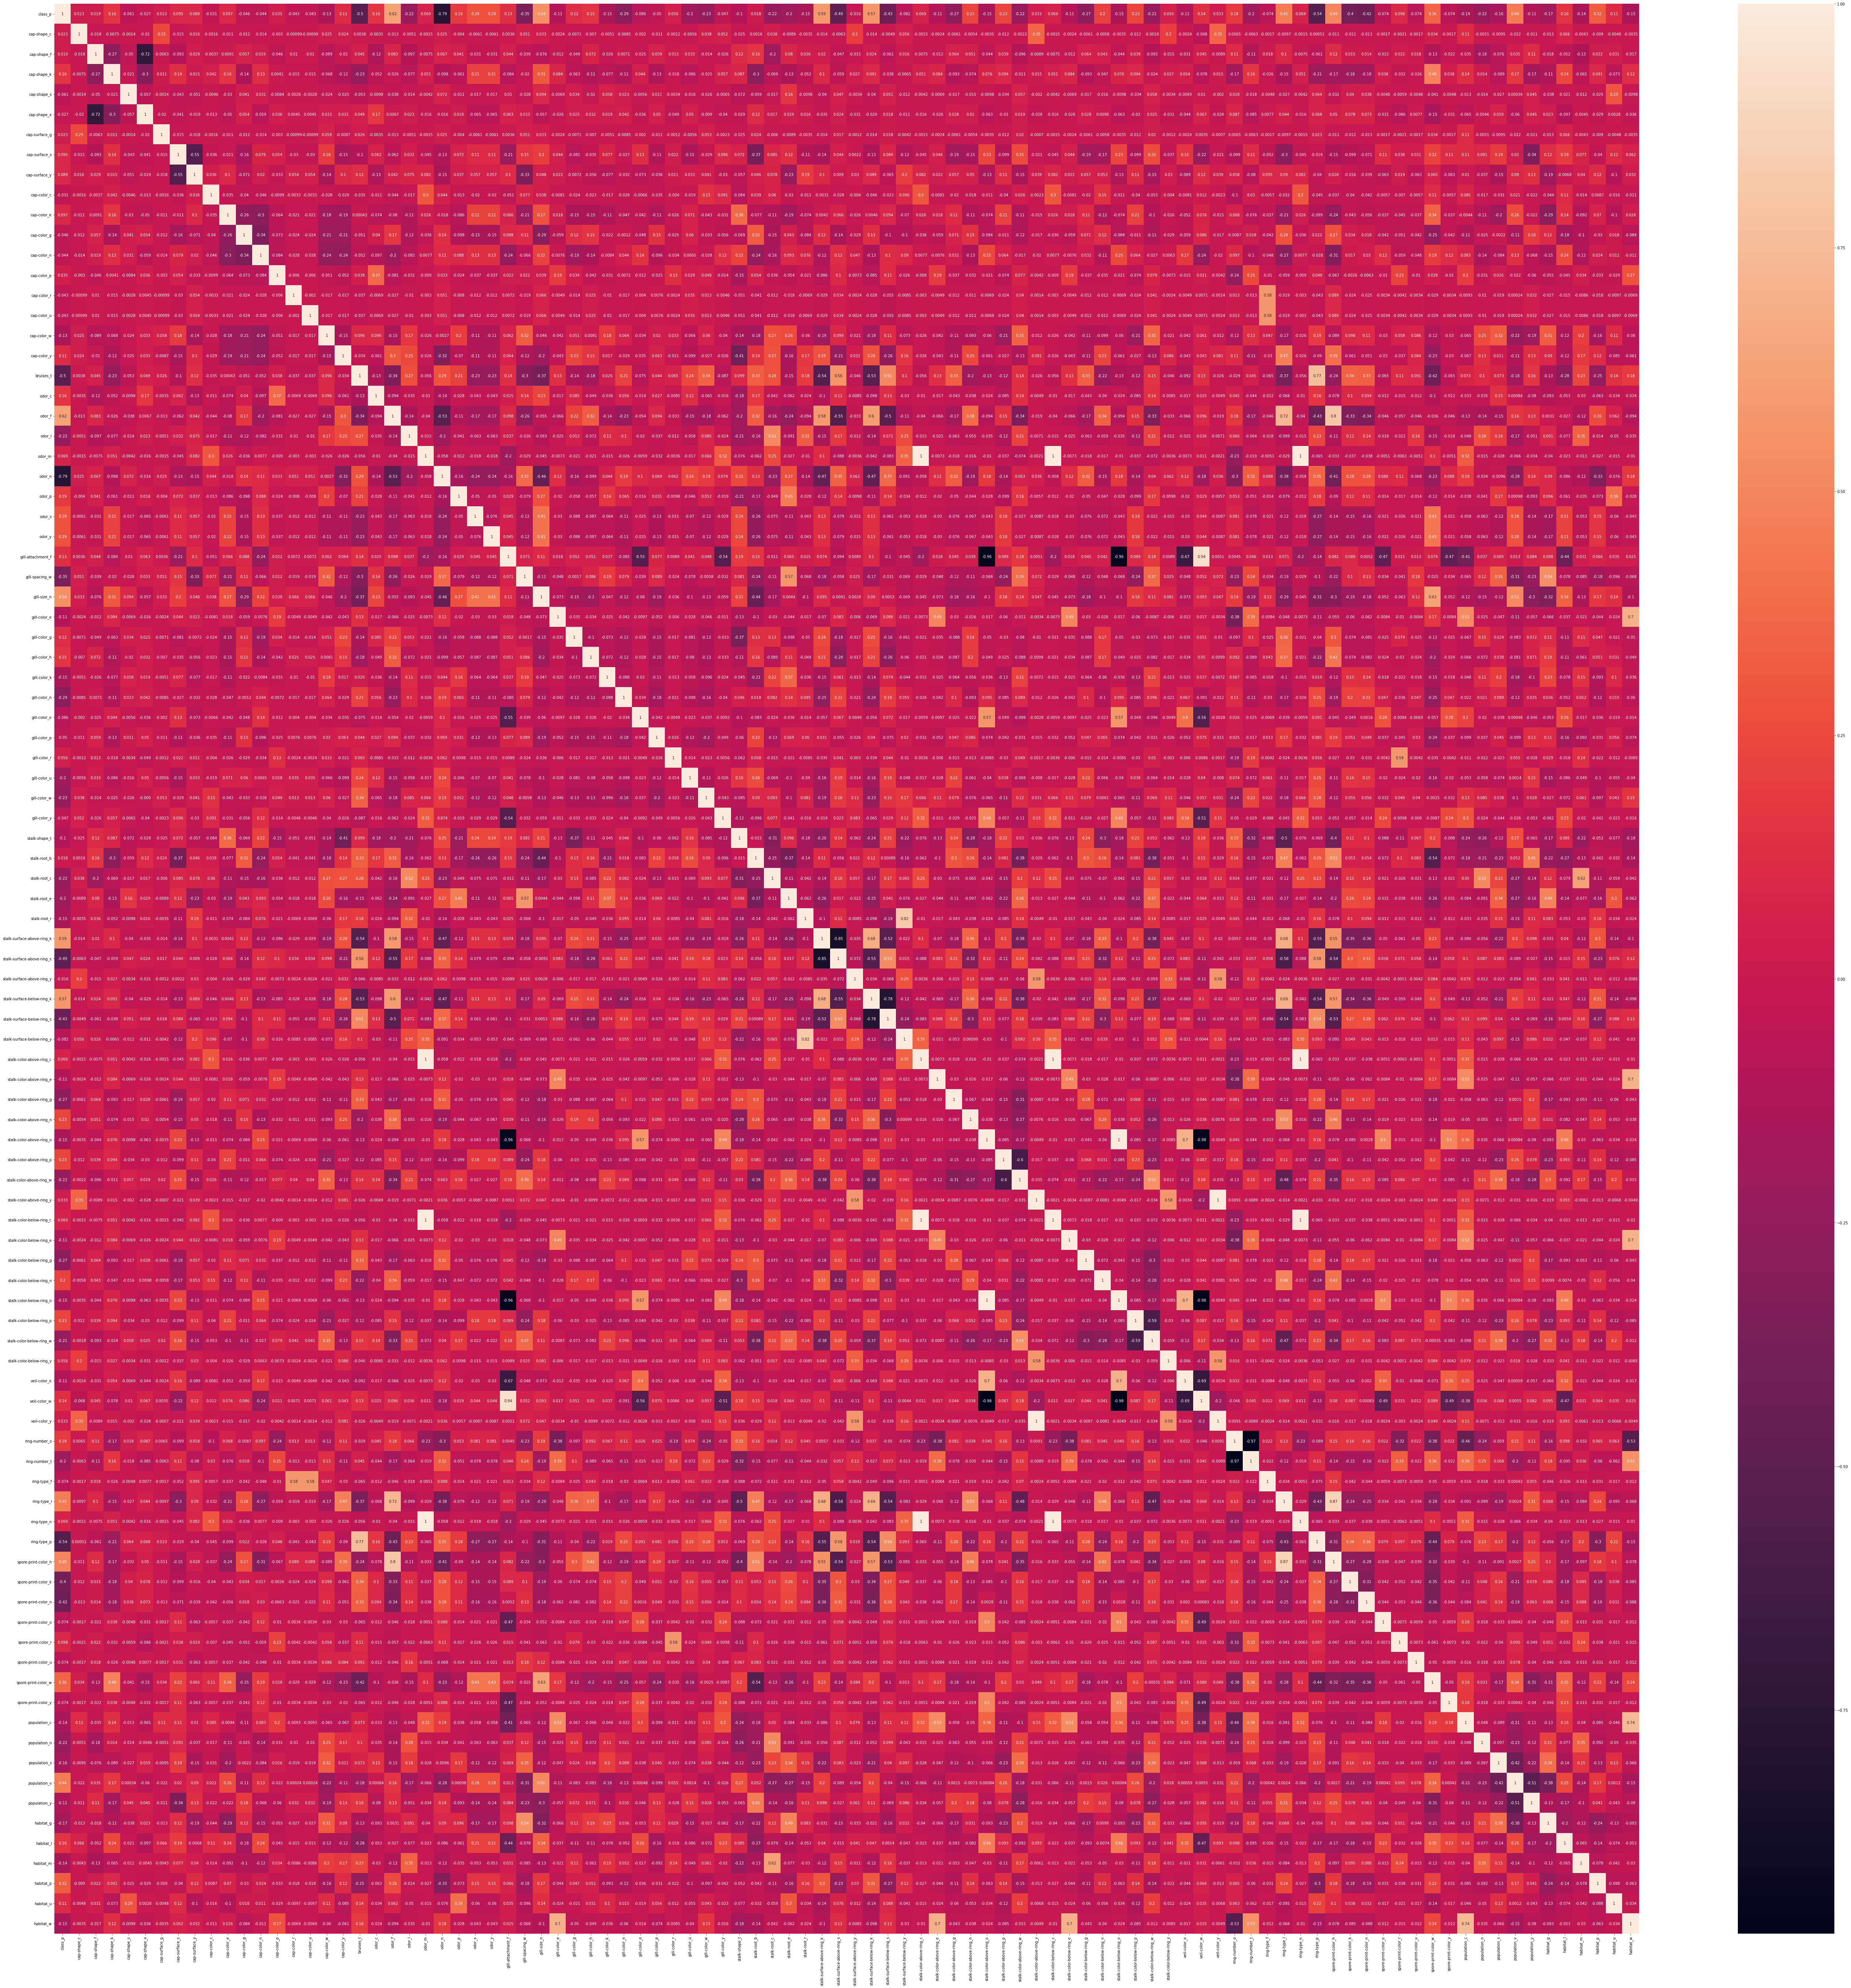

In [5]:
plt.figure(figsize=(df.corr().shape))
sn.heatmap(df.corr(),annot=True)

In [6]:
df.isna().any().any()

False

In [7]:
X = df.iloc[:,1:]
Y = df.iloc[:,0:1]

In [8]:
X.shape, Y.shape

((8124, 95), (8124, 1))

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=123)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6499, 95), (1625, 95), (6499, 1), (1625, 1))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,PReLU
from tensorflow.keras.layers import Dropout

In [12]:
model = Sequential()

In [13]:
model.add(Dense(95,"relu"))

In [14]:
model.add(Dense(64,"relu"))

In [15]:
model.add(Dense(48,"relu"))

In [16]:
model.add(Dense(48,"relu"))

In [17]:
model.add(Dense(1,"sigmoid"))

In [18]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [20]:
model_history = model.fit(X_train,y_train, batch_size=10, epochs=100, validation_split=0.3, callbacks=early_stopping)

Epoch 1/100
455/455 [==============================] - 5s 5ms/step - loss: 0.0528 - accuracy: 0.9813 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2/100
455/455 [==============================] - 2s 4ms/step - loss: 6.0190e-04 - accuracy: 0.9998 - val_loss: 1.4140e-04 - val_accuracy: 1.0000
Epoch 3/100
455/455 [==============================] - 2s 5ms/step - loss: 6.0777e-05 - accuracy: 1.0000 - val_loss: 6.5209e-05 - val_accuracy: 1.0000
Epoch 4/100
455/455 [==============================] - 2s 4ms/step - loss: 2.7101e-05 - accuracy: 1.0000 - val_loss: 3.4559e-05 - val_accuracy: 1.0000
Epoch 5/100
455/455 [==============================] - 2s 4ms/step - loss: 1.5270e-05 - accuracy: 1.0000 - val_loss: 2.1485e-05 - val_accuracy: 1.0000
Epoch 6/100
455/455 [==============================] - 2s 4ms/step - loss: 9.4666e-06 - accuracy: 1.0000 - val_loss: 1.4970e-05 - val_accuracy: 1.0000
Epoch 7/100
455/455 [==============================] - 2s 4ms/step - loss: 6.2664e-06 - accuracy: 1.00

In [21]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

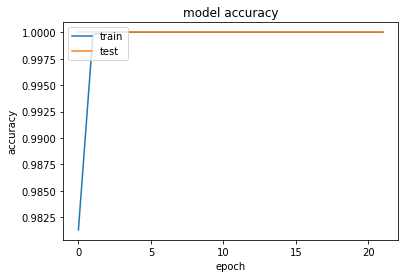

In [22]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc="upper left")
plt.show()

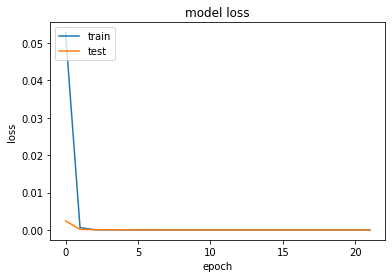

In [23]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc="upper left")
plt.show()

In [24]:
y_pred = model.predict(X_test)

51/51 [==============================] - 0s 2ms/step


In [25]:
for i in range(len(y_pred)):
  if(y_pred[i]>0.5):
    y_pred[i] = 1
  else:
    y_pred[i] = 0

In [26]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [27]:
print(score*100,"%")

100.0 %


In [28]:
print(y_test.head(10),"\n",y_pred[:10])

      class_p
186         0
2883        0
5769        0
4363        1
2889        0
5713        1
4423        1
5991        1
1877        0
7671        0 
 [[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]


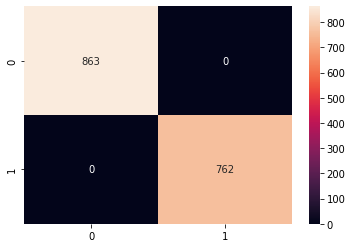

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm, annot=True, fmt='g')

###Saving the Model##

In [30]:
model.save("model.h5")

In [31]:
from tensorflow.keras.models import load_model

In [32]:
loaded_model = load_model('model.h5')

In [33]:
z = loaded_model.predict([[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0]])
z = z>=0.5
z

1/1 [==============================] - 0s 74ms/step


array([[False]])